In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(0)

# 1 確率に関するベイズの定理

ベイズの定理は以下によって定義される。

$$
p(A|B) = \frac{p(B|A)p(A)}{p(B)}
$$

## 1.1 ベイズ統計学小史

ベイズの定理を考案したのは、トーマス・ベイズであるが、それを数式として整理したのはピエール・シモン・ラプラスである。
20世紀までの統計の分野では頻度主義が多数派であり、ベイズ統計が忌避されていた。
そのため、統計以外の分野における研究者たちが頻度主義を採用していたのは、ある意味必然であったと言える。

## 1.2 導入

混乱を防ぐため、まずは、ベイズ統計を特徴づける主観確率からではなく、客観確率からベイズの定理を理解する。

### 1.2.1 確率

- 試行(trial): 偶然に左右される観測結果
- 事象(event): 試行の結果起こりうる状態
- 標本空間(sample space): 起こりうる全ての事象
- 根元事象(fundamental event): これ以上分割することのできない事象

事象Aの起こる確率は以下で定義される。
$$
p(A) = \frac{N(A)}{N(標本空間)}
$$

- 大数の法則(law of large numbers): 試行を繰り返すことで、事象Aの確率は本来の値に収束する。
- 客観確率(objective probability): 上記によって定義される確率

以下では、0.4の確率で1が出る思考を4回行い、ある回数の施行までの平均値を出している。
確かに、どの場合においても十分な回数の施行を行えば、その値は0.4に近づくことがわかる。

In [6]:
# 0.4の確率で1を取り、0.6の確率で0を取る二項分布の結果を生成
experiments = [np.random.binomial(1, 0.4, 100000) for i in range(4)]
n_trials = [5, 20, 50, 100, 100000]
results = {f'{i+1}回目':[np.mean(e[:n]) for n in n_trials] for i, e in enumerate(experiments)}
df = pd.DataFrame(results).T
df.rename(columns={c:n for c,n in zip(df.columns, n_trials)}, inplace=True)
df

,5,20,50,100,100000
1回目,0.4,0.50,0.48,0.38,0.39842
2回目,0.2,0.40,0.40,0.46,0.40425
3回目,0.4,0.45,0.36,0.36,0.39755
4回目,0.4,0.25,0.40,0.40,0.39754


### 1.2.2 分割

分割: 各事象が共通の根元事象を持たない事象の組み合わせ

$A_1, A_2, \cdots, A_a$が分割である時、以下が成立する。

$$
\sum\limits_{i=1}^{a} p(A_i) = 1
$$

### 1.2.3 同時確率

さらに分割$B_1, B_2,\cdots,B_b$を考えたとき、$A_i$と$B_j$が同時に観察される確率は$p(A_i, B_j)$で表され、これを同時確率(joint probability)と呼ぶ。

1.2.2の式をさらに拡張して(1次元から2次元へ)、以下が成立する。

$$
\sum\limits_{i=1}^{a} \sum\limits_{j=1}^{b} p(A_i, B_j) = 1
$$

3つの分割がある場合も、同様にして拡張を行えばよく、以下が成立する。

$$
\sum\limits_{i=1}^{a} \sum\limits_{j=1}^{b} \sum\limits_{k=1}^{c}  p(A_i, B_j, C_k) = 1
$$


### 1.2.4 周辺確率

同時確率で、ある分割におけるすべての和を取ると、1変数を消去したことになり、その他の変数が残ることになる。これを周辺確率(marginal probability)と呼ぶ。

$$
\sum\limits_{i=1}^{a}  p(A_i, B_j) = p(B_j)
$$

$$
\sum\limits_{j=1}^{b} p(A_i, B_j) = p(A_i)
$$

分割が3つの場合も、同様の式が導かれる。

$$
\sum\limits_{i=1}^{a} p(A_i, B_j, C_k) = p(B_j, C_k)
$$

$$
\sum\limits_{i=1}^{a} \sum\limits_{j=1}^{b}  p(A_i, B_j, C_k) = p(C_k)
$$

### 1.2.5 条件付き確率

$A_i$が観測された条件のもとで、さらに$B_j$が観測される条件、すなわち条件付き確率(condition probability)は、以下の式で表される。

$$
p(B_j|A_i) = \frac{p(B_j, A_i)}{p(A_i)}
$$

つまり、すでに$A_i$は確定しているので、これから起こりうるのは$B_1,\cdots,B_j$だけになって、分母には$\sum\limits_{j=1}^{b} p(A_i, B_j) = p(A_i)$が来る。

同様にして、3つの分割を考えるとき、$A_i$がすでに観測されている場合の条件付き確率は以下になる。

$$
p(B_j, C_k | A_i) = \frac{p(B_j, C_k)}{p(A_i)}
$$

また、$A_i, B_j$が観測されている際には、条件付き確率は以下になる。

$$
p(C_k|A_i, B_j) = \frac{p(A_i,B_j,C_k)}{p(A_i, B_j)}
$$

### 1.2.6 乗法定理・全確率の公式

条件付き確率の式を移行移行して求まる以下の式は、乗法定理(multiplication theorem of probability)と呼ばれる。

$$
p(A_i, B_j) = p(B_j|A_i) p(A_i) 
$$

また、以下の式は全確率の定理(law of total probability)と呼ばれる。

$$
\sum\limits_{i=1}^{a} p(B_j|A_i) p(A_i) = 1
$$

## 1.3 ベイズの定理

ベイズの定理は、以下の式で表される。

$$
p(A_i|B_j) = \frac{p(B_j|A_i)p(A_i)}{p(B_j)}
$$

右辺の$p(A_i)$を事前確率(prior probability)、左辺の$p(A_i|B_j)$を事後確率(posterior probability)と呼ぶ。

### 1.3.1 健診問題

以下の健診問題を考える。

> ある国の病気Aは、1万人あたり40人の割合でかかっていることが知られています。
> 病気Aにかかっている人が健診Bを受けると8割の確率で陽性となります。
> 健常な人が健診Bを受けると9割の確率で陰性となります。
> 健診Bによって陽性と判定された場合、その受信者が病気Aにかかっている確率はどれほどでしょうか？

各事象を以下のように定める。

- $A_1$: 病気にかかっている
- $A_2$: 病気にかかっていない
- $B_1$: 陽性判定
- $B_2$: 陰性判定

ベイズの定理より、"<i>健診Bによって陽性と判定された場合$(B_1)$の、その受信者が病気Aにかかっている($A_1$)確率</i>"は、以下の式で表される。

$$
p(A_1|B_1) = \frac{p(A_1, B_1) }{p(B_1)}
$$

$p(B_1)$は、周辺確率になるので、以下の式によって求まる。

$$
p(B_1) = p(A_1, B_1) + p(A_2, B_1)
$$

以下の式が成立することに注意して、最終的な式を求める。

$$
p(A_1, B_1) = p(B_1|A_1)p(A_1) \\
p(A_1, B_2) = p(B_1|A_2)p(A_2)
$$

$$
p(A_1|B_1) = \frac{p(B_1|A_1)p(A_1)}{p(B_1|A_1)p(A_1) + p(B_1|A_2) p(A_2)}
$$

- $p(A_1)$: 40/10000
- $p(A_2)$: 1-40/10000
- $p(B_1|A_1)$: 0.8
- $p(B_1|A_2)$: 1-0.9

In [7]:
p_a1 = 40/10_000
p_a2 = 1-p_a1
p_conditional_b1_a1 = 0.8
p_conditional_b1_a2 = 1-0.9
ans = (p_conditional_b1_a1*p_a1) / (p_conditional_b1_a1*p_a1 + p_conditional_b1_a2*p_a2)
print(f'ans: {ans:.3}')

ans: 0.0311


陽性という判定を仮に受けたとしても、実際に病気に罹っている確率は3%しかない。

### 1.3.2 逆確率

先の問題では、答えを求める式に$p(B_1|A_1)$と$p(B_1|A_2)$が出現することが自然であることに注意する。
なぜなら、現実の状況においては、まず医師が病気かどうかを判定したのち(つまり、条件Aが確定したのち)、健診にかけて陽性・陰性の判定を確認することが自然だからだ。

そして、求める式が$p(A_1|B_1)$であることも自然である。
なぜなら、観測されているのは、$B_1$であるからだ。

一方でこの問題では、原因は"病気"で、結果は"健診の診断結果"なのだから、$p(A_1|B_1)$は、結果をもとに原因を求める確率であるといえる。
因果関係が逆転していることから、これを<b>逆確率(inverse probability)</b>と呼ぶ。

### 1.3.3 独立

事象$A_i$が事象$B_j$の結果に影響を与えない場合、以下の式が成立する。

$$
p(A_i|B_j) = p(B_j|A_i)\\
p(A_i,B_j) = p(A_i)p(B_j)
$$

また、事象$A$が観測された条件のもとで、$B,C$が独立な場合、以下の式が成立する。

$$
p(B,C|A) = p(B|A) p(C|A)
$$

### 1.3.4 ベイズ更新

事象$A$を知るための観測結果$B, C$が得られたとし、$B$と$C$が独立な場合を考える。
事後確率は以下のように計算される。

\begin{aligned}
p(A|B,C)&=\frac{p(B, C|A)p(A)}{p(B,C)}\\
&=\frac{p(B|A)p(C|A)}{p(B)p(C)} (\because B,Cは独立)\\
&=\frac{p(C|A)}{p(C)} \cdot \frac{p(B|A)p(A)}{p(B)}\\
&=\frac{p(C|A)}{p(C)} \cdot p(A|B)
\end{aligned}

上の式では、Bが分かった時点での事後確率$p(A|B)$が現れていることが分かる。
従って、例えば事象$B$が確定したのち、事象$C$が確定したというような際には、まず$p(A|B)$を計算しておき、その後の事象$C$確定後に、$\frac{p(C|A)}{p(C)}$をかけ合わせることで、最終的な事後確率$p(A|B,C)$を計算可能である。
このように、事後確率は帰納的に求めていくことができる。
曰く、「<i>今日の事後分布は、明日の事前分布</i>」。
これを<b>ベイズ更新(Bayesian updating)</b>と呼ぶ。

### 1.3.5 迷惑メールフィルタ

「絶対必勝」,「完全無料」,「投資指南」,「急騰予想」の4つの単語が含まれたメールが迷惑メールかどうかを判定することを考える。
過去のデータから、それぞれの単語が含まれているときの迷惑メール及び非迷惑メールである確率は以下である。

In [8]:
df = pd.DataFrame(
    {
        '迷惑メール': [0.11, 0.12, 0.15, 0.13],
        '非迷惑メール': [0.01, 0.02, 0.01, 0.02]
    },
    index=['絶対必勝', '完全無料', '投資指南', '急騰予想']
)
df

,迷惑メール,非迷惑メール
絶対必勝,0.11,0.01
完全無料,0.12,0.02
投資指南,0.15,0.01
急騰予想,0.13,0.02


それぞれの単語が含まれているかどうかに関わらず、そもそも、すべてのメールの中で迷惑メールが含まれる確率は0.6であるとする。
すると、ベイズ更新を用いて以下のように、迷惑メールである確率を求めていくことができる。

In [9]:
p = 0.6
print(f'initial: {p:.5f}')
for i, row in df.iterrows():
    p = p * row['迷惑メール'] / (p*row['迷惑メール'] + (1-p)*row['非迷惑メール'])
    print(f'{i}: {p:.5f}')

initial: 0.60000
絶対必勝: 0.94286
完全無料: 0.99000
投資指南: 0.99933
急騰予想: 0.99990


## 1.4 主観確率

ベイズ統計は長らく統計の分野でタブー視されてきた。ここまでの説明内容は、統計学全体で認められている内容ではあるものの、以降の内容でベイズ統計に対する異論が生じる。

### 1.4.1 客観確率による事前確率

ベイズの定理における事前確率に客観確率を用いれば、それは頻度主義的な観点からも正しい。
先の例の迷惑メールの事前確率は、頻度に基づく客観確率であり、何の問題もない。

### 1.4.2 一期一会な事象

問題となるのは、事前確率に主観確率を用いる場合である。
何度も試行を繰り返すことのできる事象は、データ数を増やすことで、事前確率に客観確率を当てはめることができる。
しかしながら、そうではない場合、客観確率を知ることはできず、主観確率を用いることになる。

### 1.4.3 理由不十分の原則

以下の問題を考える。

碁石問題
> 真っ暗な部屋に同じ形の3つの壺、赤い壺・青い壺・緑の壺が置いてあります。
> 壺の中には、形・大きさ・手触り・重さの全く等しい碁石が、それぞれ10個入っています。
> そのうち黒い碁石は、それぞれ3個・4個・5個です。
> 手探りで1つの壺を選び、その壺から碁石を1つ取り出しました。
> 明るい部屋に移動し、碁石の色を確認すると黒でした。
> 選んだ壺が赤い壺であった確率を求めてください。

求める確率は以下の式で求められる。

\begin{aligned}
p(赤い壺|黒)&=\frac{p(赤い壺、黒)}{p(赤い壺、黒)+p(青い壺、黒)+p(緑の壺、黒)}\\
&=\frac{p(赤い壺)\cdot 3/10}{p(赤い壺)\cdot 3/10 + p(青い壺)\cdot 4/10 + p(緑の壺)\cdot 5/10}\\
\end{aligned}

もちろん問題となるのは、$p(赤い壺),p(青い壺),p(緑の壺)$である。
もしこの問題で、大学入試の如く「壺の選ぶ確率は同様に確からしい」という条件が与えられているのなら、$p(赤い壺)=p(青い壺)=p(緑の壺)=1/3$とすれば良い。
しかし、現実の問題では、このようには各確率が等しくない場合も多々ある。
もしかしたら、この碁石問題の状況では、各壺までの距離が異なっていて、各壺を選ぶ確率はそれぞれ異なるかもしれない。

各壺を選ぶ確率は、何回も試行を繰り返すことにより客観確率として求まるが、そのような実験をするには手間である。
そこで、<i>仕方なく</i>各確率は同様に確からしいのだとして、$p(赤い壺)=p(青い壺)=p(緑の壺)=1/3$とすることを、<b>理由不十分の原則</b>と呼ぶ。
<u>理由不十分の原則によって選ばれた確率は、必ずしもフェアであるとは限らない。</u>

### 1.4.4 血液鑑定問題

血液鑑定問題
> 東京で殺人事件が起きました。
> 現場に残された犯人の血液を鑑定した結果、この町に住むA氏の血液と特徴が一致しました。
> それは10万人に1人という高い一致率です。
> 他に証拠は全くありません。
> このときA氏が犯人である確率を求めてください。

先ほどと同様にA氏が犯人である確率を求めると、以下のようになる。

\begin{aligned}
p(犯人|一致)&=\frac{p(犯人)}{p(犯人) + (1-p(犯人))\cdot 1/100000}
\end{aligned}

少しわかりづらいので補足しておくと、健診問題と異なり、ここでは血液鑑定は100%の確率で的中すると考える。
その上で、犯人の血液が本当にA氏の血液の特徴と同じならば、$p(一致|犯人)=1$となる。
しかし、血液の特徴がたまたま一緒なだけで、実際には犯人ではないという場合もありうるので、$(1-p(犯人))\cdot 1/100000$が分母に足される。

様々な$p(犯人)$を様々に変えた際の$p(犯人|一致)$を考えてみる。

In [10]:
def calc_posterior(prior):
    return prior/(prior + (1-prior)/100_000)

#### 理由不十分の原則

理由不十分の原則に基づいて、$p(犯人)=1/2$を割り当てると、99.999%の確率でA氏は犯人である。
しかし、本当にそうであろうか？

In [11]:
prior_prob = 1/2
print(prior_prob, calc_posterior(prior_prob))

0.5 0.9999900000999989


#### 反例1

日本では、10万人に一人が殺人を犯す。
そこで、$p(犯人)=1/100000$を割り当てる。

すると、p(犯人|一致)の確率は50%である。

In [12]:
prior_prob = 1/100_000
print(prior_prob, calc_posterior(prior_prob))

1e-05 0.5000025000125


#### 反例2

殺人現場である東京にアクセス可能な人は、3700万人なので、$p(犯人)=1/37,000,000$が妥当であると考える。

すると、$p(犯人|一致)$は2.7%である。

In [13]:
prior = 1/37_000_000
print(prior_prob, calc_posterior(prior))

1e-05 0.002695417862410185


#### 様々なp(犯人)におけるp(犯人|一致)

以下に、事前確率を様々に変化させた時の事後確率を示す。

x軸を対数プロットした2番目のグラフのほうが分かりやすい。
事前確率が様々に変化すると、事後確率も全く異なってくる。
事前確率が恣意的に決まるようだと、事後確率は客観的な値として意味を持たないことになり、問題である。

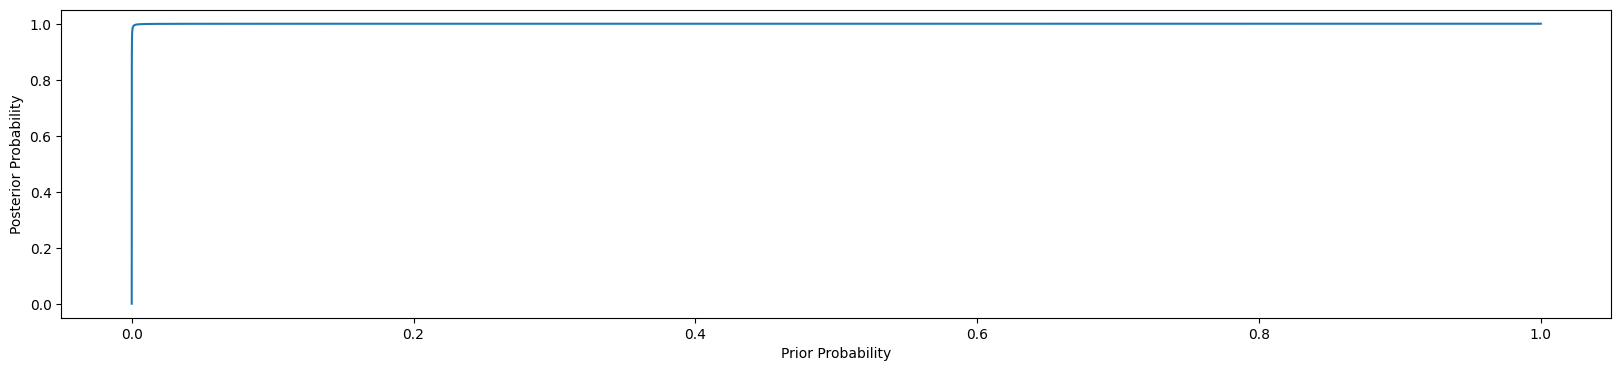

In [14]:
priors = np.logspace(-100, 0, 10000000)
posteriors = calc_posterior(priors)
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot()
ax.plot(priors, posteriors)
ax.set_xlabel('Prior Probability')
ax.set_ylabel('Posterior Probability')
plt.show()


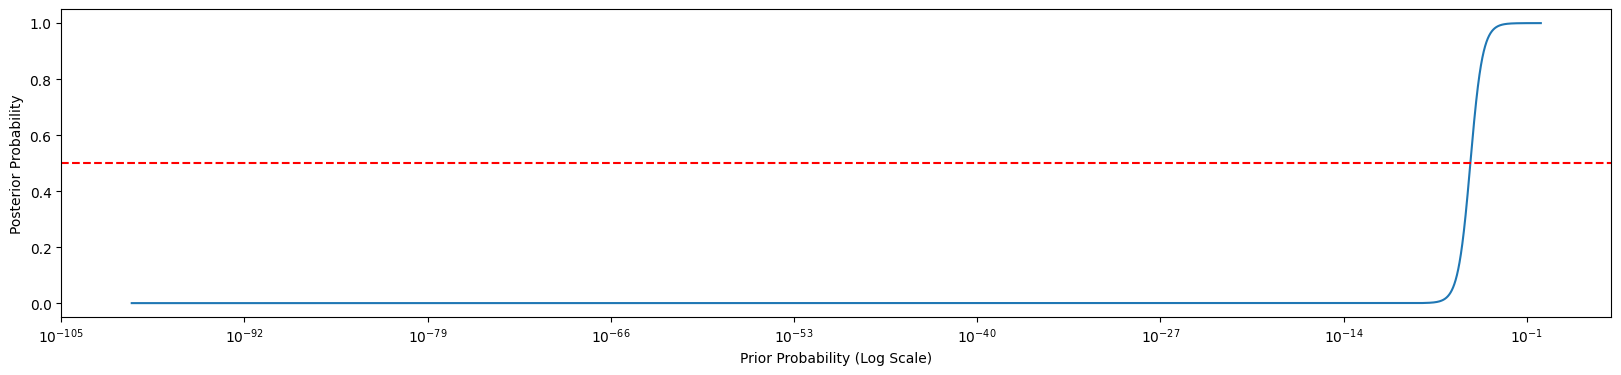

In [15]:
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot()
ax.plot(priors, posteriors)
ax.set_xlabel('Prior Probability (Log Scale)')
ax.set_ylabel('Posterior Probability')
ax.set_xscale('log')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

### 1.4.5 事前確率を圧倒するデータ

上述のように、事前確率に対して事後確率は変化する。
しかしながら、事前確率が不適切に定められてしまっても、客観的なデータを通じて十分な回数のベイズ更新を行えば、事後確率は最終的に同じ値へ収束する。

今、迷惑メールAが存在し、その中にB,C,...,Hという単語が含まれていたとする。そして、それぞれの単語xが迷惑メールに含まれている確率が1/10($p(x|迷惑メール)=1/10$)、迷惑メールでないメールに含まれている確率が1/100($p(x|迷惑メールでない)=1/100$)であるとする。

すると、それぞれの単語が含まれている時の事後確率は以下のようになる。

\begin{aligned}
p(Aが迷惑メール|x) &= \frac{p(x|Aが迷惑メール) \cdot p(Aが迷惑メール)}{p(x|Aが迷惑メール) \cdot p(Aが迷惑メール) + p(x|Aが迷惑メールでない) \cdot (1-p(Aが迷惑メール))}
\end{aligned}

ここで、事前確率$p(Aが迷惑メール)$には、主観確率として様々な値を設定可能に思われる。
しかし、今メールにはB,C,...,Hという7単語が含まれており、それぞれの単語によりベイズ更新がなされる。
様々な事前確率にたいして7回のベイズ更新の結果を示したのが以下である。

事前確率に関わらず、ベイズ更新によって事後確率は同様の値になることが確認できる。

In [16]:
def calc_posterior(prior):
    return (prior/10) / (prior/10 + (1-prior)/100) 

In [27]:
priors = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
columns = ['B', 'C', 'D', 'E', 'F', 'G', 'H']
res = {}
for p in priors:
    posteriors = [p]
    for i in range(len(columns)):
        posteriors.append(calc_posterior(posteriors[-1]))
    res[p] = posteriors
    posteriors.pop(0)
df = pd.DataFrame(res).T
df.rename(columns={i: c for i, c in enumerate(columns)}, inplace=True)
df

,B,C,D,E,F,G,H
0.01,0.091743,0.502513,0.909918,0.990197,0.999011,0.999901,0.999990
0.05,0.344828,0.840336,0.981354,0.998104,0.999810,0.999981,0.999998
0.10,0.526316,0.917431,0.991080,0.999101,0.999910,0.999991,0.999999
0.20,0.714286,0.961538,0.996016,0.999600,0.999960,0.999996,1.000000
0.30,0.810811,0.977199,0.997672,0.999767,0.999977,0.999998,1.000000
0.40,0.869565,0.985222,0.998502,0.999850,0.999985,0.999999,1.000000
0.50,0.909091,0.990099,0.999001,0.999900,0.999990,0.999999,1.000000


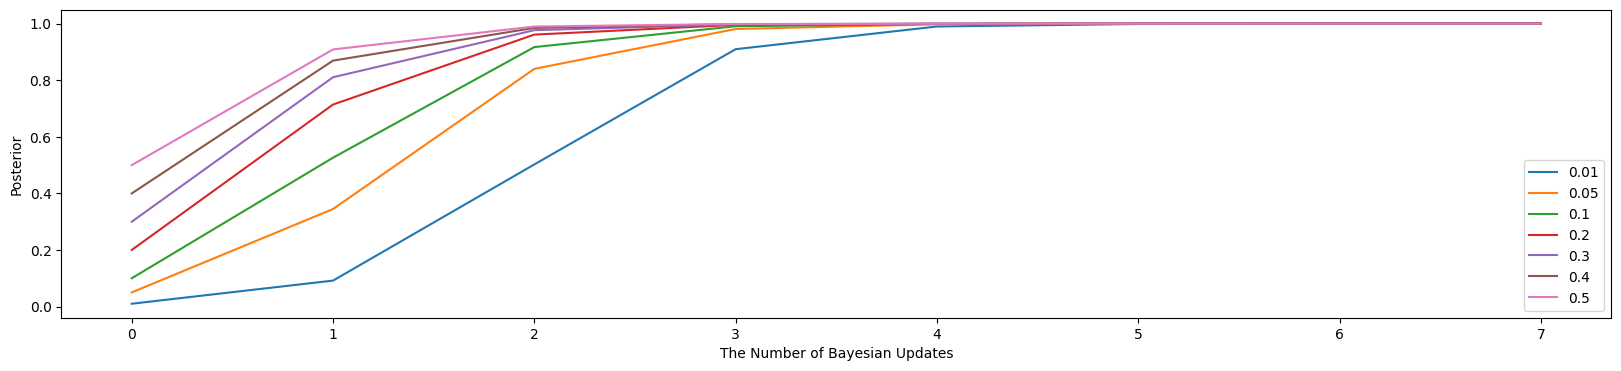

In [50]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot()
for idx, row in df.iterrows():
    ax.plot([idx]+row.tolist(), label=idx)
ax.legend()
ax.set_xlabel('The Number of Bayesian Updates')
ax.set_ylabel('Posterior')
plt.show()

#### 1.4.6 私的分析と公的分析

主観確率を特徴の1つとするベイズ統計は、2種の分析に分類することができる。

1つは、<b>私的分析(private analysis)</b>で、事後確率の高速な計算に重きをおく。
事後確率の客観的な正しさは二の次とすることが多い。

一方で、<b>公的分析(public analysis)</b>では、分析の客観性が重視され、科学論文での分析などに使用される。

<!-- #### 1.4.7 ベイズの定理の第3の使用法

ベイズの定理は、以下の式で表されるのであった。

$$
p(A|B) = \frac{p(B|A)p(A)}{p(B)}
$$

ここで、条件付き確率$p(B|A)$と事前確率$p(B)$に主観確率と客観確率のどちらかを使用するかによって、使用法を3つに分けることができる。

1つ目は、条件付き確率と事前確率の両方に客観確率を用いる使用法である。
これは伝統的な統計学の考え方に基づく方法で、先の検診問題ではこの使用法を用いた。

2つ目は、条件付き確率には客観確率を用い、事前確率には主観確率を用いる方法である。
これは伝統的な統計学に反する使用法であり、碁石問題と血液鑑定問題ではこの使用法を用いた。

3つ目は、条件付き確率にも事前確率にも主観確率を用いる方法である。
以下の3囚人問題を考える。

> ある監獄に、罪状はいずれも似たり寄ったりである3人の死刑囚A,B,Cがそれぞれ独房に入れられています。
> 3人まとめて処刑される予定でしたが、1人が恩赦になって釈放され、残り2人が処刑されることとなりました。
> 誰が恩赦になるか知っている看守に「私は助かるのか」と囚人が聞いても看守は答えてくれません。
> そこで、Aは「BとCのうち少なくとも1人処刑されるのは確実なのだから、2人の中で処刑される1人の名前を教えてくれても私についての情報を与えることにはならないだろう。1人を教えてくれないか」と頼みました。
> 看守はAの言い分に納得して、「Bは処刑される」と答えました。
> それを聞いたAは「これで自分が助かる確率は1/3から1/2に増えた」と喜びました。
> 実際には、この答えを聞いた後、Aの釈放される確率はいくらになるでしょうか。

ここで、Xが釈放される事象を$X_a$、処刑される確率を$X_d$と置くと、事後確率は以下のようになる。

\begin{aligned}
p(A_a|B_d) = \frac{p(B_d|A_a)p(A_a)}{p(B_d)}
\end{aligned}

ここで、p(B_d)として考えられるのは、Bが死亡してかつ、AまたはCが釈放される確率なので、以下のようになる。

\begin{aligned}
p(B_d) = p(B_d|A_a)p(A_a) + p(B_d|C_a)p(C_a)
\end{aligned}

ここで、たとえばBが死亡してAも死亡するなどといった確率は$p(B_d|C_a)p(C_a)$と同じことなので、考える必要がないことに注意する。

理由不十分の原則より、$p(X_a)=1/3$とするのが妥当である。
また、Aが生存する時、BまたはCのどちらかが処刑されることになるが、これも理由不十分の原則より$p(B_d|A_a)=1/2$とする。

従って最終的な事後確率は、$p(A_a|B_d)=1/2$と計算される。 -->

## 復習用まとめ

- 分割とは?
- 同時確率とは？
- 周辺確率とは？
- 条件付き確率とは？
- 乗法定理とは？
- 全確率の公式とは？
- ベイズの定理とは？
- B,Cが独立で、Aが観測された時の条件付き確率
- ベイズ更新の導出
- 理由不十分の原則とは？